In [ ]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pickle

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
from IPython.display import display as print
from core_lib import MyDataset, plot_dataset,r2_loss,get_predict_ks, get_dcdt_func_for_sunode
from core_lib import get_predict_starts
from core_lib import get_model, get_model2, distance_func, MY_EPSILON


In [ ]:
db_csv_path = "dataset/data.csv"
idata_save_path = "runtime/pts/odes-exp04-idata-4-number-1core-c0number-halfnormks-from-core.py-success.dt"

dataset_ori = MyDataset(db_csv_path)
df_ori = dataset_ori.get_df()
cct_names, rates_names, error_names = dataset_ori.get_var_col_names()
c0 = df_ori[cct_names].iloc[0].values


In [ ]:
# 假设都是一级动力学
k_kinetics = np.repeat(1, 11).astype(np.uint8)
# k_kinetics = np.array([0,0,0,0,1,1,0,0,1,1,0]).astype(np.uint8)
ks = np.array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299, 0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432, 0.00177611])
#  =======================================================

# t_eval = np.linspace(0, 150, 100)
t_eval = np.array([0.5, 48, 96, 144])

dataset = MyDataset(db_csv_path)
df = dataset.get_df()
cct_names, rates_names, error_names = dataset.get_var_col_names()
c0 = df[cct_names].iloc[0].values

dataset.set_as_sim_dataset(t_eval, c0, t0=0.5, args=(ks, k_kinetics))
df = dataset.get_df()

plot_dataset(dataset, dataset)

In [ ]:

mcmc_model = get_model(dataset, t_eval, k_kinetics, distance=distance_func, epsilon=MY_EPSILON, k_sigma_priors=0.01, kf_type=0, c0_type=0)

In [ ]:
# print(get_format_time(),idata_save_path)
# print(ks, c0)
pm.model_to_graphviz(mcmc_model)

In [6]:
print(idata_save_path)
idata_lv = pickle.load(open(idata_save_path, 'rb'))

# idata_lv = pm.sample_smc(draws=2000, chains=1, model=mcmc_model, progressbar=True)
# pickle.dump(idata_lv,open(idata_save_path, 'wb'))

Only one chain was sampled, this makes it impossible to run some convergence checks


In [7]:
# az.plot_trace(idata_lv, kind="rank_vlines");
df[cct_names]

,xNH3,xNO3,xNO2,xNOrg,xN2,ANH3,ANO3,ANO2,ANOrg,AN2
0,1.166667,2.398810,0.031100,62.285000,0.000071,7.948635,0.068579,0.072310,0.009857,0.008320
1,5.837077,5.539303,0.562166,52.633247,0.654963,1.032250,0.095816,0.616494,0.036313,1.429357
2,7.792400,7.098904,0.702743,45.482189,2.402741,0.478912,0.104943,0.301793,0.055503,0.603151
3,8.424316,7.693937,0.727132,39.954083,4.541125,0.288235,0.103466,0.194706,0.068306,0.358341


In [8]:
print(az.summary(idata_lv, round_to=10))
print(ks)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k1,0.001551,0.000909,0.000221,0.003124,0.000030,0.000021,700.417611,591.676577,NaN
k2,0.002999,0.000393,0.002305,0.003739,0.000015,0.000011,743.954190,657.041257,NaN
k3,0.008934,0.005672,0.000781,0.019256,0.000188,0.000133,607.183586,216.334971,NaN
k4,0.004778,0.000525,0.003840,0.005771,0.000016,0.000011,1076.374729,654.394752,NaN
k5,0.006459,0.003148,0.001259,0.012057,0.000150,0.000116,440.784190,137.455437,NaN
k6,0.008226,0.000823,0.006742,0.009706,0.000027,0.000019,934.957052,1484.658225,NaN
k7,0.002470,0.001352,0.000512,0.005002,0.000051,0.000036,648.798748,803.497553,NaN
k8,0.003569,0.002102,0.000543,0.007529,0.000102,0.000072,501.943826,453.142394,NaN
k9,0.004189,0.000168,0.003868,0.004475,0.000008,0.000006,469.249865,119.347855,NaN
k10,0.002167,0.000205,0.001787,0.002563,0.000008,0.000006,833.579923,481.077767,NaN


array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299,
       0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432,
       0.00177611])

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


'r2_loss'

0.9999848201567764

/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:385: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


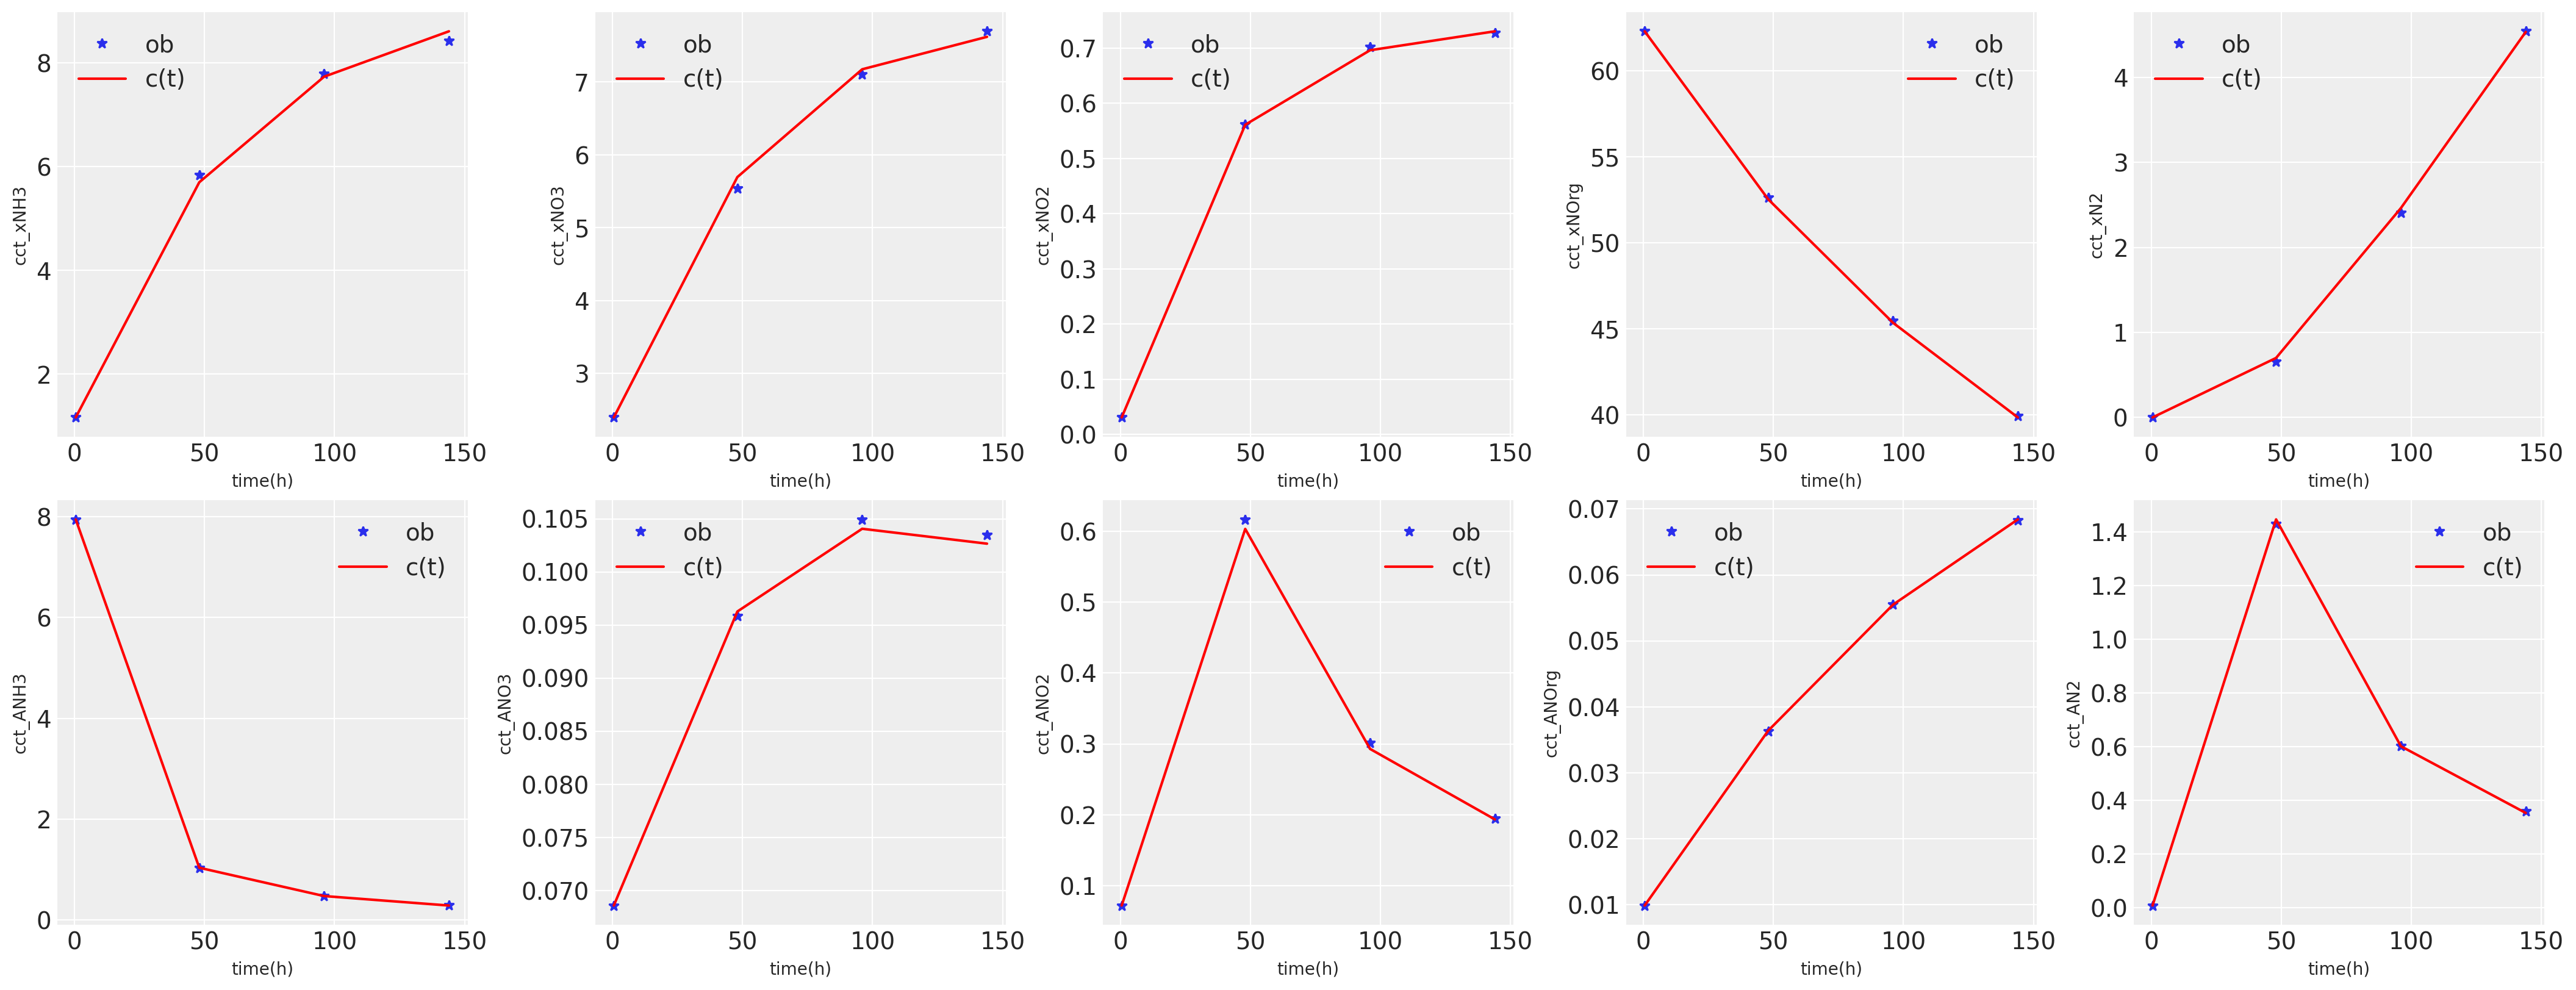

/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:385: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


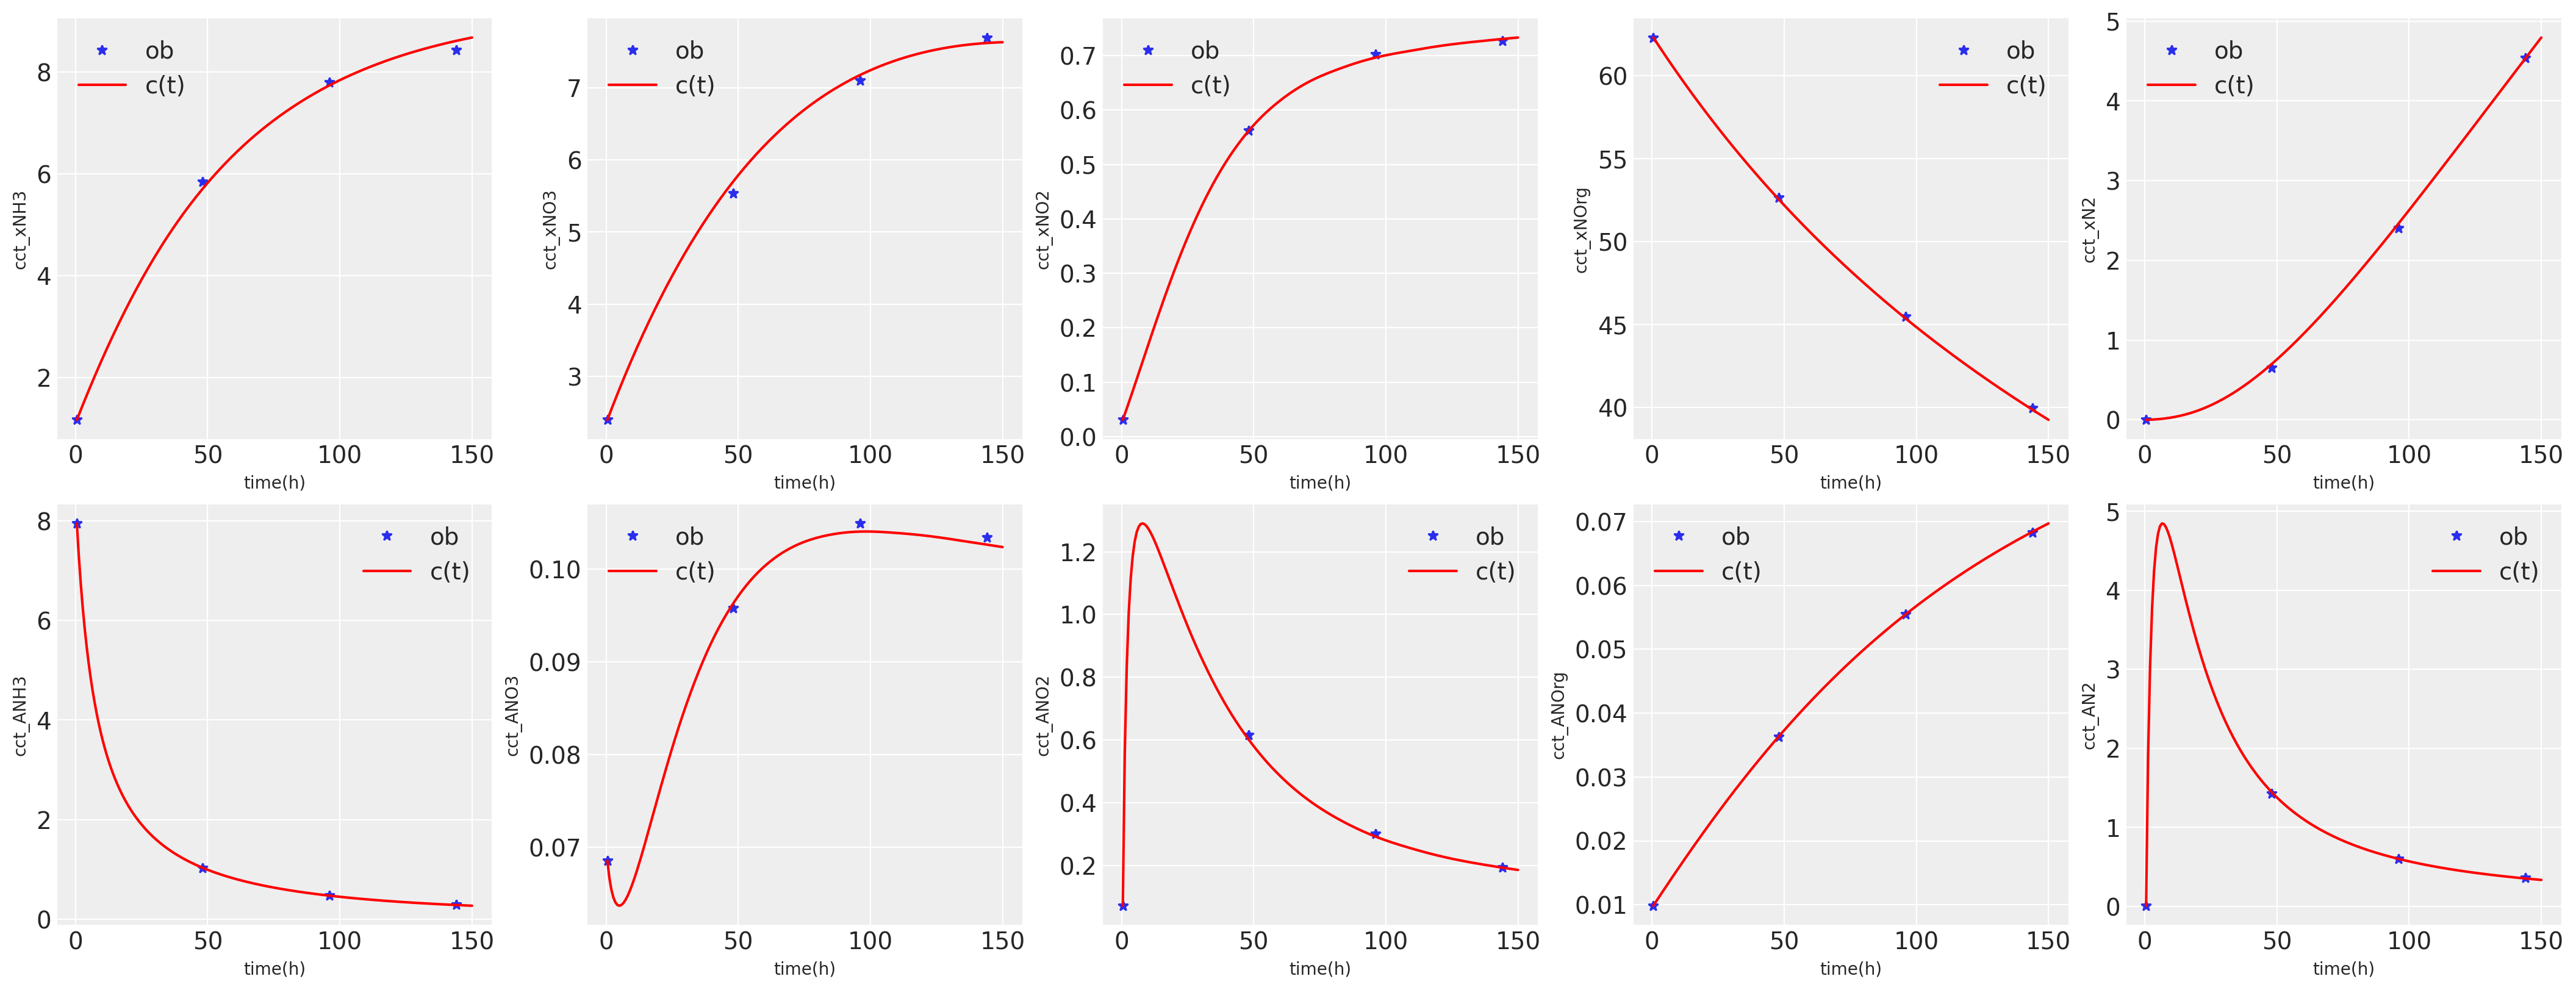

In [9]:
ks_predict = get_predict_ks(idata_lv)
k_kinetics = np.repeat(1, 11).astype(np.uint8)
t_eval = np.array([0.5, 48, 96, 144])

dataset_new = MyDataset(db_csv_path)
cct_names, rates_names, error_names = dataset_new.get_var_col_names()
gt_s = dataset_new.get_cct()[0]

dataset_new.set_as_sim_dataset(t_eval, gt_s, args=(ks_predict, k_kinetics))

print("r2_loss", r2_loss(dataset_new.get_cct(), dataset.get_cct()))
plot_dataset(dataset, dataset_new)


t_eval_new = np.linspace(0.5, 150, 200)
dataset_new2 = MyDataset(db_csv_path)
dataset_new2.set_as_sim_dataset(t_eval_new, gt_s, t0=0.5, args=(ks_predict, k_kinetics))
plot_dataset(dataset, dataset_new2)